In [55]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [56]:
import os
train_audio_path = os.chdir('./drive/My Drive/Colab Notebooks/Voice Recognition/MultiWords/')
train_audio_path

FileNotFoundError: ignored

In [0]:
import os
import librosa , librosa.display  #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

In [7]:
samples, sample_rate = librosa.load('./aa_sthaanamlo_vere_vaallu_unnaru.wav', sr = 16000)
Audio(data=samples, rate=sample_rate)

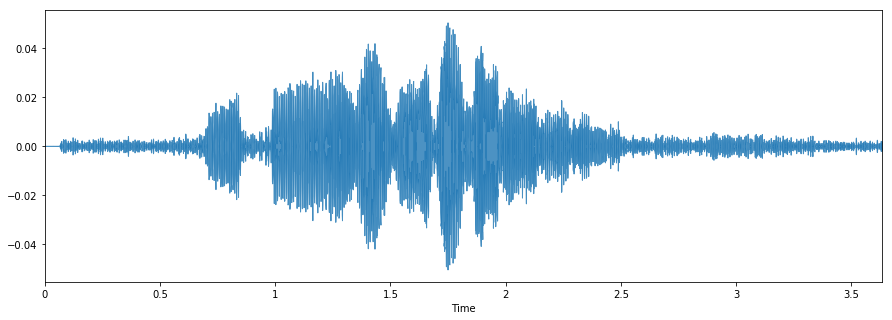

In [8]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(samples,sample_rate,alpha=0.8)

In [9]:
ipd.Audio(samples, rate=sample_rate)
print(sample_rate)

16000


## Resampling
From the above, we can understand that the sampling rate of the signal is 16,000 Hz. Let us re-sample it to 8000 Hz since most of the speech-related frequencies are present at 8000 Hz:

In [10]:
samples2 = librosa.resample(samples, sample_rate, 8000)
print(len(samples2))
ipd.Audio(samples, rate=8000)

29069


In [11]:
labels=os.listdir('./')
print(labels)
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in label if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
   

['Aakupachani_chandamamala.wav', 'desa_rajadhanulaina_paṭṭaṇalu_peddaviga_mariyu_sandaḍiga_uṇṭayi.wav', 'Aase_pachadanam.wav', 'Aalakinche_aanandhala_paate.wav.wav', 'Aasala_baanam_nuvveraa.wav', 'Aalayana_Velasina_Devata.m4a', 'aa_sthaanamlo_vere_vaallu_unnaru.wav', 'aashale_kantilo_baasalai.wav.wav', 'abhinandanalu.wav', 'Aa_Nimisham.wav', 'abbo_yenta_jaalira_tamariki_naa_meeda.wav', 'meeku_aṅthaa_shubhaṅ_kalagaalani_korukuṅtunnaanu.wav', 'Meerem_vinipisthunnaru.wav', 'addaalu_pagili_poyaayi.wav', 'adhi_gurthunchukondi.wav', 'Adigi_choodu_padara.wav.wav', 'adhi_chaala_kharidhainadhi.wav', 'adhi_gurthupettukondi.wav', 'mimmalni_kalavadaṅ_chaalaa_saṅthoashaṅgaa_uṅdhi.wav', 'Adigi_chudu_padara.wav', 'naa_vimaanamu_anthaa_malugu_chaepalatho_nindi_poyunthi.wav', 'Adhi_mullathoti_ninde.wav', 'Adhi_aa_tholi_kshanalalo.wav', 'adi_taragati.wav', 'Adiga_adiga_yedhalo_layanadiga.wav', 'naenu_baagunnaanu,_meeru_aelaa_unnaaru.wav', 'aekkada_vunnaru.wav', 'Ah_adhamey_chupeynu.wav', 'a

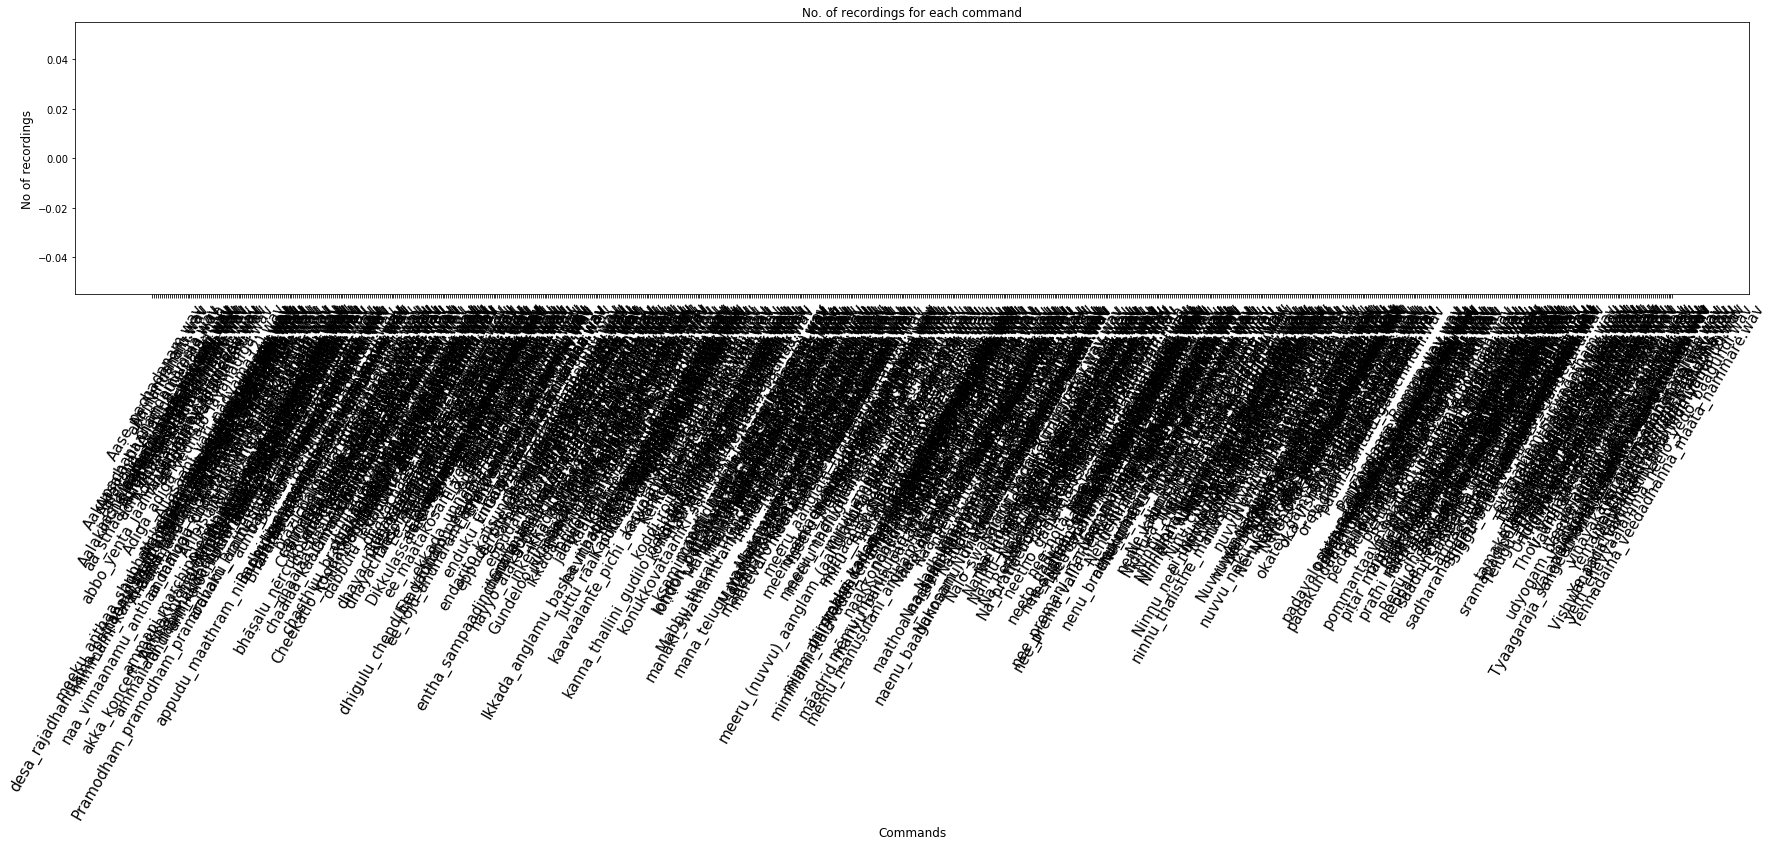

In [12]:
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()


In [0]:
duration_of_recordings=[]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([6.26571429, 6.36571429, 6.46571429, 6.56571429, 6.66571429,
        6.76571429, 6.86571429, 6.96571429, 7.06571429, 7.16571429,
        7.26571429]),
 <a list of 10 Patch objects>)

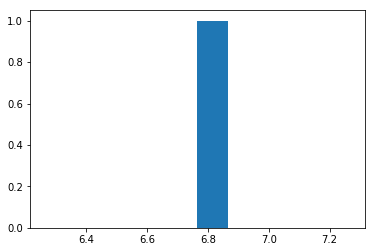

In [15]:
sample_rate, samples =wavfile.read('desa_rajadhanulaina_paṭṭaṇalu_peddaviga_mariyu_sandaḍiga_uṇṭayi.wav')
duration_of_recordings.append(float(len(samples)/sample_rate))
plt.hist(np.array(duration_of_recordings))

In [16]:
len(samples)

298368

In [0]:
all_wave = []
all_label = []
for label in labels:
    #print(label)
    samples, sample_rate = librosa.load(label, sr = 16000)
    #print('before:',samples)
    #samples = librosa.resample(samples, sample_rate, 8000)
    all_wave.append(samples)


In [0]:
a = []
for i in labels:
  a.append(i[:-4])
  

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(a)
classes= list(le.classes_)

In [20]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

Using TensorFlow backend.


In [0]:
samples, sample_rate = librosa.load('aa_sthaanamlo_vere_vaallu_unnaru.wav', sr=16000)

In [39]:
len(samples)


58137

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [50]:
y = ohe.fit_transform(np.array(y).reshape(-1,1)).toarray()
y.shape

(602176, 2)

In [54]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(all_wave,y,stratify=y,test_size = 0.2,random_state=7,shuffle=True)

ValueError: ignored